Consistency Score(Batting) = (W1 * (Inns/Mat)) +(W2 * (NO/Inns)) +(W3 * (Runs/BF)) +(W4 * Ave) +(W5 * ((50s + 2 * 100s)/Inns)) -(W6 * (Zeros/Inns))

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def analyze_and_visualize(df):
    # Select Batting Features for Analysis
    features = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', "100's", "50's", "Zeros", '4s', '6s']
    df_analysis = df[features]
    
    # Replace infinities and NaN with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Batting Features')
    plt.show()
    
    return df_analysis


In [29]:
def calculate_batting_formula_components(df):
    """
    Calculates the components of the Batting Consistency Score formula.
    
    Consistency_Score(Batting) = (W1 * (Inns/Mat)) +
                                 (W2 * (NO/Inns)) +
                                 (W3 * (Runs/BF)) +
                                 (W4 * Ave) +
                                 (W5 * ((50s + 2 * 100s)/Inns)) -
                                 (W6 * (Zeros/Inns))
    """
    df_components = df.copy()

    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Mat'] = pd.to_numeric(df_components['Mat'], errors='coerce')
    df_components['Inns'] = pd.to_numeric(df_components['Inns'], errors='coerce')
    df_components['NO'] = pd.to_numeric(df_components['NO'], errors='coerce')
    df_components['Runs'] = pd.to_numeric(df_components['Runs'], errors='coerce')
    df_components['BF'] = pd.to_numeric(df_components['BF'], errors='coerce')
    df_components['Ave'] = pd.to_numeric(df_components['Ave'], errors='coerce')
    df_components["100's"] = pd.to_numeric(df_components["100's"], errors='coerce')
    df_components["50's"] = pd.to_numeric(df_components["50's"], errors='coerce')
    df_components["Zeros"] = pd.to_numeric(df_components["Zeros"], errors='coerce')

    # Replace infinities and NaN with 0
    df_components = df_components.replace([np.inf, -np.inf], 0).fillna(0)

    # Perform calculations, ensuring float division and handling potential NaN values
    df_components['Inns_per_Mat'] = df_components['Inns'].astype(float) / df_components['Mat'].astype(float)
    df_components['NO_per_Inns'] = df_components['NO'].astype(float) / df_components['Inns'].astype(float)
    df_components['Runs_per_BF'] = df_components['Runs'].astype(float) / df_components['BF'].astype(float)
    df_components['All_Runs'] = df_components['Runs'].astype(float) / 100
    df_components['Ave_Score'] = df_components['Ave'].astype(float)  # Direct Ave
    df_components['50s100s_per_Inns'] = (df_components["50's"].astype(float) + 2 * df_components["100's"].astype(float)) / df_components['Inns'].astype(float)
    df_components['Zeros_per_Inns'] = df_components["Zeros"].astype(float) / df_components['Inns'].astype(float)

    return df_components


In [30]:
data = pd.read_excel("../../all season cleaned data/batsamset_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")


Data types of your columns before calculation:


In [31]:
numeric_cols = ['Inns', 'Mat', 'NO', 'Runs', 'BF', 'Ave', "100's", "50's", "Zeros"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes)  # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Inns', 'Mat', 'NO', 'Runs', 'BF', 'Ave', "100's", "50's", "Zeros"]
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum())  # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any')  # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned))  # Print length of df_cleaned

# Calculate batting formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_batting_formula_components(df_cleaned)  # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score',
    'All_Runs',
    '50s100s_per_Inns',
    'Zeros_per_Inns'
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr()  # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Batting Consistency Formula Components (after NaN removal):")
print(correlation_matrix)



Data types of your columns AFTER explicit numeric conversion:
Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS          int64
Ave       float64
BF          int64
SR        float64
100's       int64
50's        int64
Zeros       int64
4s          int64
6s          int64
Type       object
dtype: object

Number of NaN values BEFORE removing:
Inns     0
Mat      0
NO       0
Runs     0
BF       0
Ave      0
100's    0
50's     0
Zeros    0
dtype: int64

Number of rows BEFORE removing NaNs: 95
Number of rows AFTER removing NaNs: 95

Correlation Matrix of Batting Consistency Formula Components (after NaN removal):
                  Inns_per_Mat  NO_per_Inns  Runs_per_BF  Ave_Score  All_Runs  \
Inns_per_Mat          1.000000    -0.370876     0.188284   0.229410  0.219563   
NO_per_Inns          -0.370876     1.000000     0.238706   0.313217  0.099219   
Runs_per_BF           0.188284     0.238706     1.000000   0.721879  0.255035 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_batting_consistency_components(df_components):
    features = [
        'Inns_per_Mat',
        'NO_per_Inns',
        'Runs_per_BF',
        'Ave_Score',
        'All_Runs',
        '50s100s_per_Inns',
        'Zeros_per_Inns'
    ]
    df_analysis = df_components[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)  # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Batting Consistency Formula Components')
    plt.show()

    return df_analysis


                  Inns_per_Mat  NO_per_Inns  Runs_per_BF  Ave_Score  All_Runs  \
Inns_per_Mat          1.000000    -0.370876     0.188284   0.229410  0.219563   
NO_per_Inns          -0.370876     1.000000     0.238706   0.313217  0.099219   
Runs_per_BF           0.188284     0.238706     1.000000   0.721879  0.255035   
Ave_Score             0.229410     0.313217     0.721879   1.000000  0.599738   
All_Runs              0.219563     0.099219     0.255035   0.599738  1.000000   
50s100s_per_Inns      0.323251    -0.040475     0.606009   0.831257  0.575731   
Zeros_per_Inns       -0.027787     0.023197    -0.130684  -0.237449 -0.181080   

                  50s100s_per_Inns  Zeros_per_Inns  
Inns_per_Mat              0.323251       -0.027787  
NO_per_Inns              -0.040475        0.023197  
Runs_per_BF               0.606009       -0.130684  
Ave_Score                 0.831257       -0.237449  
All_Runs                  0.575731       -0.181080  
50s100s_per_Inns          1.00000

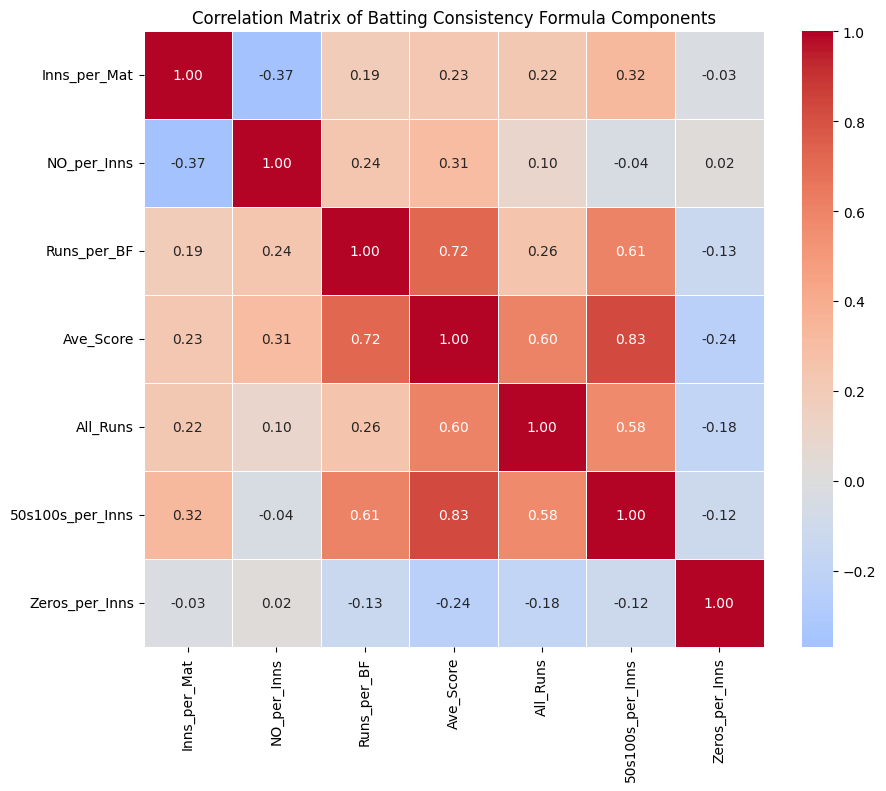

In [33]:
analyzed_df = analyze_batting_consistency_components(calculations_with_data)


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Assuming calculations_with_data is your DataFrame after computing the batting derived metrics,
# and that it includes the following component columns:
features = [
    'Inns_per_Mat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score',
    'All_Runs',
    '50s100s_per_Inns',
    'Zeros_per_Inns'
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# You can use the loadings for PC1 (which explains most variance) as guidance for the weights:
pc1_loadings = loadings['PC1']
# Normalize the PC1 loadings (absolute values) to sum to 1:
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# For AHP, you typically have expert input in the form of a pairwise comparison matrix.
# Here’s an example pairwise comparison matrix for the 6 criteria. 
# (You should adjust these values based on domain expertise.)

pairwise_matrix = np.array([
    [1,    2,    3,    4,    5,    6,    7],
    [1/2,  1,    2,    3,    4,    5,    6],
    [1/3,  1/2,  1,    2,    3,    4,    5],
    [1/4,  1/3,  1/2,  1,    2,    3,    4],
    [1/5,  1/4,  1/3,  1/2,  1,    2,    3],
    [1/6,  1/5,  1/4,  1/3,  1/2,  1,    2],
    [1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
# Normalize to sum to 1
ahp_weights = ahp_weights / ahp_weights.sum()

# Create a Series with these weights for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # weights: array of shape (6,)
    # df: DataFrame containing the metrics in the order of 'features'
    return np.dot(df[features].values, weights)

# Define an objective function.
# In this example, we aim to maximize the variance of the consistency score.
# (Maximizing variance might help differentiate between players.)
def objective(weights, df):
    scores = consistency_score(weights, df)
    # We minimize the negative variance.
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
# Define bounds if needed (here we constrain weights between 0 and 1)
bounds = [(0, 1)] * len(features)

# Run the optimization
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

# Display the optimized weights
optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                       PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat      0.211262 -0.627494  0.154345 -0.149861  0.709153 -0.088664   
NO_per_Inns       0.105482  0.738124  0.089358  0.052442  0.561495 -0.203191   
Runs_per_BF       0.441029  0.152858  0.167760 -0.583863 -0.089425  0.624900   
Ave_Score         0.546026  0.137319  0.027434 -0.030405 -0.019266 -0.309619   
All_Runs          0.404975 -0.047568 -0.108653  0.767679  0.077267  0.473129   
50s100s_per_Inns  0.511879 -0.129448  0.128193  0.043029 -0.399567 -0.487806   
Zeros_per_Inns   -0.159893  0.013524  0.954494  0.204424 -0.088509  0.051800   

                       PC7  
Inns_per_Mat     -0.067679  
NO_per_Inns      -0.277034  
Runs_per_BF      -0.120799  
Ave_Score         0.764910  
All_Runs         -0.052679  
50s100s_per_Inns -0.552567  
Zeros_per_Inns    0.104341  

Suggested Weights from PCA (based on PC1 loadings):
Ave_Score           0

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.optimize as opt

# Define the full list of batting metrics in the order corresponding to the weights.
# Note: 'Zeros_per_Inns' is the only feature that we want to minimize.
features = [
    'Inns_per_Mat',      # maximize
    'NO_per_Inns',       # maximize
    'Runs_per_BF',       # maximize
    'Ave_Score',         # maximize
    '50s100s_per_Inns',  # maximize
    'All_Runs',          # maximize
    'Zeros_per_Inns'     # minimize -> subtract its weighted value
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill NaNs and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# Use PC1 loadings as guidance for the weights.
pc1_loadings = loadings['PC1']

# For features to maximize, take absolute values.
# (We later subtract the contribution from Zeros_per_Inns.)
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# Example 7x7 pairwise comparison matrix for the 7 criteria.
pairwise_matrix = np.array([
    [1,    2,    3,    4,    5,    6,    7],
    [1/2,  1,    2,    3,    4,    5,    6],
    [1/3,  1/2,  1,    2,    3,    4,    5],
    [1/4,  1/3,  1/2,  1,    2,    3,    4],
    [1/5,  1/4,  1/3,  1/2,  1,    2,    3],
    [1/6,  1/5,  1/4,  1/3,  1/2,  1,    2],
    [1/7,  1/6,  1/5,  1/4,  1/3,  1/2,  1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
ahp_weights = ahp_weights / ahp_weights.sum()  # Normalize

# Create a Series with these weights for clarity.
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # For the first 6 features (maximize)
    weights_max = weights[:6]
    # For Zeros_per_Inns (minimize) -> will be subtracted.
    weight_zeros = weights[6]
    
    score_max = np.dot(df[features[:6]].values, weights_max)
    score_zeros = df['Zeros_per_Inns'].values * weight_zeros
    return score_max - score_zeros

# Define an objective function (maximize variance of scores).
def objective(weights, df):
    scores = consistency_score(weights, df)
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
bounds = [(0, 1)] * len(features)

# Run the optimization on the PCA data (df_pca)
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)




PCA Loadings (each column is a principal component):
                       PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat      0.211262 -0.627494  0.154345 -0.149861  0.709153 -0.088664   
NO_per_Inns       0.105482  0.738124  0.089358  0.052442  0.561495 -0.203191   
Runs_per_BF       0.441029  0.152858  0.167760 -0.583863 -0.089425  0.624900   
Ave_Score         0.546026  0.137319  0.027434 -0.030405 -0.019266 -0.309619   
50s100s_per_Inns  0.511879 -0.129448  0.128193  0.043029 -0.399567 -0.487806   
All_Runs          0.404975 -0.047568 -0.108653  0.767679  0.077267  0.473129   
Zeros_per_Inns   -0.159893  0.013524  0.954494  0.204424 -0.088509  0.051800   

                       PC7  
Inns_per_Mat     -0.067679  
NO_per_Inns      -0.277034  
Runs_per_BF      -0.120799  
Ave_Score         0.764910  
50s100s_per_Inns -0.552567  
All_Runs         -0.052679  
Zeros_per_Inns    0.104341  

Suggested Weights from PCA (based on PC1 loadings):
Ave_Score           0

In [47]:
import pandas as pd

# Full list of batting metrics (including All_Runs now)
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'All_Runs']

# Original AHP weights from expert pairwise comparisons for batting metrics
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.354284,
    'NO_per_Inns': 0.239928,
    'Runs_per_BF': 0.158655,
    'Ave_Score': 0.103625,
    'All_Runs': 0.067565,
    '50s100s_per_Inns': 0.044769,
    'Zeros_per_Inns': 0.031175
})

# Original PCA weights derived from PC1 loadings for batting metrics
pca_weights = pd.Series({
    'Ave_Score': 0.229370,
    '50s100s_per_Inns': 0.215026,
    'Runs_per_BF': 0.185264,
    'Inns_per_Mat': 0.088745,
    'All_Runs': 0.170118,
    'Zeros_per_Inns': 0.067167,
    'NO_per_Inns': 0.044310
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors for specific batting metrics
boost_factors = {
    'Inns_per_Mat': 2.0,
    'NO_per_Inns': 1.0,
    'Runs_per_BF': 1.0,
    'Ave_Score': 2.0,
    'All_Runs': 2.0,
    '50s100s_per_Inns': 2.0,
    'Zeros_per_Inns': 1.0
}

# Apply the boost factors
hybrid_weights_boosted = hybrid_weights * pd.Series(boost_factors)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted /= hybrid_weights_boosted.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights = hybrid_weights_boosted.sum()

# Output results
hybrid_weights_boosted, sum_of_weights


(50s100s_per_Inns    0.119053
 All_Runs            0.122139
 Ave_Score           0.175572
 Inns_per_Mat        0.341114
 NO_per_Inns         0.112563
 Runs_per_BF         0.103492
 Zeros_per_Inns      0.026068
 dtype: float64,
 1.0)

In [ ]:
import pandas as pd

# Full list of batting metrics (including All_Runs now)
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'All_Runs']

# Original AHP weights from expert pairwise comparisons for batting metrics
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.354284,
    'NO_per_Inns': 0.239928,
    'Runs_per_BF': 0.158655,
    'Ave_Score': 0.103625,
    'All_Runs': 0.067565,
    '50s100s_per_Inns': 0.044769,
    'Zeros_per_Inns': 0.031175
})

# Original PCA weights derived from PC1 loadings for batting metrics
pca_weights = pd.Series({
    'Ave_Score': 0.229370,
    '50s100s_per_Inns': 0.215026,
    'Runs_per_BF': 0.185264,
    'Inns_per_Mat': 0.088745,
    'All_Runs': 0.170118,
    'Zeros_per_Inns': 0.067167,
    'NO_per_Inns': 0.044310
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors for specific batting metrics
boost_factors = {
    'Inns_per_Mat': 1.0,
    'NO_per_Inns': 1.0,
    'Runs_per_BF': 2.0,
    'Ave_Score': 2.0,
    'All_Runs': 1.0,
    '50s100s_per_Inns': 2.0,
    'Zeros_per_Inns': 1.0
}

# Apply the boost factors
hybrid_weights_boosted = hybrid_weights * pd.Series(boost_factors)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted /= hybrid_weights_boosted.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights = hybrid_weights_boosted.sum()

# Output results
hybrid_weights_boosted, sum_of_weights


(50s100s_per_Inns    0.136549
 All_Runs            0.070045
 Ave_Score           0.201375
 Inns_per_Mat        0.195623
 NO_per_Inns         0.129105
 Runs_per_BF         0.237404
 Zeros_per_Inns      0.029899
 dtype: float64,
 0.9999999999999999)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define your list of features
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'All_Runs']

# Assume calculations_with_data is your DataFrame with the batting metrics
df_pca = calculations_with_data[features].fillna(0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Get loadings for each component
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)

# Use PC1 loadings to derive weights. 
# Taking absolute values ensures no negative weight. 
pc1_loadings = loadings['PC1']
pca_weights = np.abs(pc1_loadings)
pca_weights /= pca_weights.sum()  # Normalize to sum to 1

print("PCA-Only Weights (based on PC1 loadings):")
print(pca_weights)


PCA-Only Weights (based on PC1 loadings):
Inns_per_Mat        0.104155
NO_per_Inns         0.056012
Runs_per_BF         0.239658
Ave_Score           0.270854
50s100s_per_Inns    0.251713
Zeros_per_Inns      0.077609
Name: PC1, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Define your list of features
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'All_Runs']

# Define the pairwise comparison matrix (adjust these based on your expert input)
pairwise_matrix = np.array([
    [1,   2,   3,   4,   5,   6],
    [1/2, 1,   2,   3,   4,   5],
    [1/3, 1/2, 1,   2,   3,   4],
    [1/4, 1/3, 1/2, 1,   2,   3],
    [1/5, 1/4, 1/3, 1/2, 1,   2],
    [1/6, 1/5, 1/4, 1/3, 1/2, 1]
])

# Compute the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real

# Normalize weights so they sum to 1
ahp_weights /= ahp_weights.sum()

# Create a Series for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)

print("AHP-Only Weights (from pairwise comparisons):")
print(ahp_weights_series)


AHP-Only Weights (from pairwise comparisons):
Inns_per_Mat        0.382497
NO_per_Inns         0.250402
Runs_per_BF         0.159580
Ave_Score           0.100630
50s100s_per_Inns    0.064077
Zeros_per_Inns      0.042813
dtype: float64


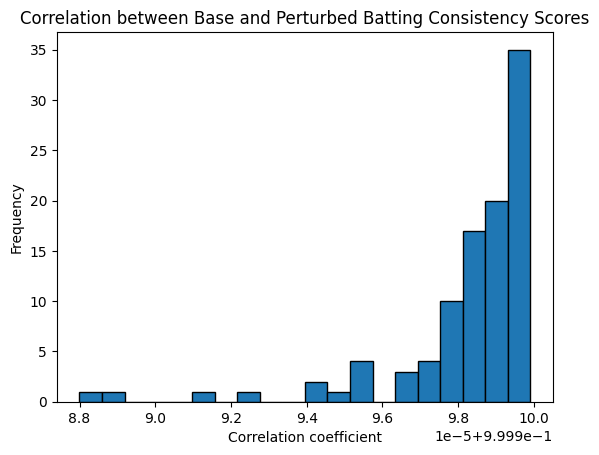

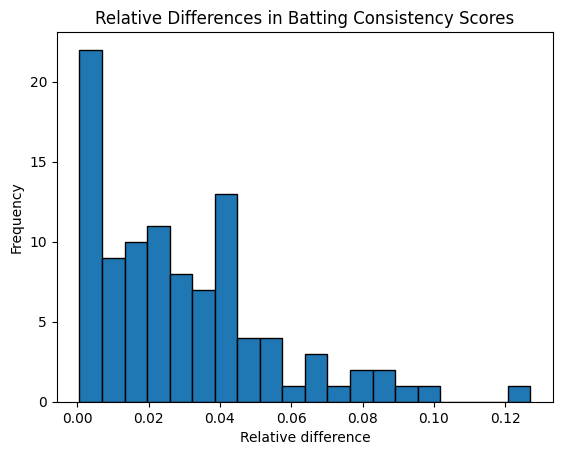

Mean correlation: 0.9999982362899089
Mean relative difference: 0.03024350170348241


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the batting derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'All_Runs']

# Define a function to compute the composite consistency score for batting
def compute_consistency_score(df, weights):
    # Make sure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Compute the base consistency scores with your nominal batting weights
base_scores = compute_consistency_score(calculations_with_data, hybrid_weights_boosted)

# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(calculations_with_data, perturbed_weights)
    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = [np.corrcoef(base_scores, scores)[0, 1] for scores in perturbed_scores_list]

# Also compute the mean relative difference between perturbed scores and base scores
relative_differences = [
    np.mean(np.abs(scores - base_scores)) / np.mean(np.abs(base_scores))
    for scores in perturbed_scores_list
]

# Plot the distribution of correlation coefficients
plt.hist(correlations, bins=20, edgecolor='k')
plt.title("Correlation between Base and Perturbed Batting Consistency Scores")
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of relative differences
plt.hist(relative_differences, bins=20, edgecolor='k')
plt.title("Relative Differences in Batting Consistency Scores")
plt.xlabel("Relative difference")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print("Mean correlation:", np.mean(correlations))
print("Mean relative difference:", np.mean(relative_differences))


# FINAL CONSISTENCY SCORE CALCULATION
### Consistency Score(Batting) = (0.205400 * (Inns/Mat)) +(0.131957 * (NO/Inns)) +(0.252260 * (Runs/BF)) +(0.208423 * Ave) +(0.165378 * ((50s + 2 * 100s)/Inns)) -(0.036582 * (Zeros/Inns))

In [39]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read Data from Excel
# -----------------------------
# Replace 'batting_data.xlsx' with your actual Excel file path.
# Adjust the sheet name if necessary.
df = pd.read_excel('/Users/pavanbandaru/Downloads/cricket-squad-selection/all season cleaned data/batsamset_ipl.xlsx', sheet_name='Sheet1')

# Example expected columns:
# 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'BF', 'Ave', '50s', '100s', 'Zeros'
# If your columns have different names, update accordingly.

# -----------------------------
# 2. Compute Derived Metrics
# -----------------------------
# Derived metrics:
# Inns_per_Mat = Innings / Matches
# NO_per_Inns  = Not Outs / Innings
# Runs_per_BF  = Runs / Balls Faced
# 50s100s_per_Inns = (50s + 2*100s) / Innings
# Zeros_per_Inns = Zeros / Innings

df['Inns_per_Mat'] = df['Inns'] / df['Mat']
df['NO_per_Inns'] = df['NO'] / df['Inns']
df['Runs_per_BF'] = df['Runs']/100
df['50s100s_per_Inns'] = (df["50's"] + 2 * df["100's"]) / df['Inns']
df['Zeros_per_Inns'] = df['Zeros'] / df['Inns']

# Fill any NaNs (e.g., if division by zero occurred)
df.fillna(0, inplace=True)

# -----------------------------
# 3. Define Weight Sets
# -----------------------------
# PCA-only weights (example values; replace with your actual PCA-derived weights)
pca_weights = pd.Series({
    'Inns_per_Mat': 0.104155,
    'NO_per_Inns': 0.056012,
    'Runs_per_BF': 0.239658,
    'Ave': 0.270854,     
    '50s100s_per_Inns': 0.251713,
    'Zeros_per_Inns': 0.077609
})
pca_weights /= pca_weights.sum()  # Normalize

# AHP-only weights (example values; replace with your actual AHP-derived weights)
ahp_weights = pd.Series({
    'Inns_per_Mat': 0.382497,
    'NO_per_Inns': 0.250402,
    'Runs_per_BF': 0.159580,
    'Ave': 0.100630,
    '50s100s_per_Inns': 0.064077,
    'Zeros_per_Inns': 0.042813
})
ahp_weights /= ahp_weights.sum()  # Normalize

# Hybrid weights: combine AHP and PCA with a factor alpha (70% AHP, 30% PCA)
alpha = 0.7
hybrid_weights = alpha * ahp_weights + (1 - alpha) * pca_weights
hybrid_weights /= hybrid_weights.sum()  # Normalize

# -----------------------------
# 4. Compute Consistency Score and Rank
# -----------------------------
def compute_scores_and_rank(df, weights, method_name):
    """
    Computes the consistency score using:
    Score = (W1 * Inns_per_Mat) + (W2 * NO_per_Inns) + (W3 * Runs_per_BF)
            + (W4 * Ave) + (W5 * 50s100s_per_Inns) - (W6 * Zeros_per_Inns)
    and then ranks the players.
    """
    df[f'Consistency_Score_{method_name}'] = (
        weights['Inns_per_Mat'] * df['Inns_per_Mat'] +
        weights['NO_per_Inns'] * df['NO_per_Inns'] +
        weights['Runs_per_BF'] * df['Runs_per_BF'] +
        weights['Ave'] * df['Ave'] +
        weights['50s100s_per_Inns'] * df['50s100s_per_Inns'] -
        weights['Zeros_per_Inns'] * df['Zeros_per_Inns']
    )
    # Rank players: higher score gets a better rank (i.e., 1 is best)
    df[f'Rank_{method_name}'] = df[f'Consistency_Score_{method_name}'].rank(ascending=False, method='min').astype(int)
    return df

# Compute scores and ranks for each weighting method
df = compute_scores_and_rank(df, pca_weights, "PCA")
df = compute_scores_and_rank(df, ahp_weights, "AHP")
df = compute_scores_and_rank(df, hybrid_weights, "Hybrid")

# -----------------------------
# 5. Display the Rankings
# -----------------------------
columns_to_display = ['Player', 
                      'Consistency_Score_PCA', 'Rank_PCA',
                      'Consistency_Score_AHP', 'Rank_AHP',
                      'Consistency_Score_Hybrid', 'Rank_Hybrid']

# Sorting by Hybrid ranking as an example
ranking_output = df[columns_to_display].sort_values(by='Rank_Hybrid')

print("Player Rankings using PCA-only, AHP-only, and Hybrid weights:")
print(ranking_output.head(10))

# Optionally, save the results to an Excel file
ranking_output.to_excel('player_rankings.xlsx', index=False)


Player Rankings using PCA-only, AHP-only, and Hybrid weights:
          Player  Consistency_Score_PCA  Rank_PCA  Consistency_Score_AHP  \
86       V Kohli              29.832818         1              17.088372   
85     DA Warner              26.910498         2              14.988224   
91      S Dhawan              25.939844         3              14.776640   
87     RG Sharma              24.084574         4              13.980634   
88      MS Dhoni              23.298984         6              12.744697   
75      KL Rahul              23.731911         5              12.466968   
79  F du Plessis              20.869925         7              11.315086   
89     AM Rahane              19.434434         8              10.828633   
92    KD Karthik              18.854888        11              10.778951   
76     SV Samson              19.050487        10              10.548777   

    Rank_AHP  Consistency_Score_Hybrid  Rank_Hybrid  
86         1                 20.911706         

In [40]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read Data from Excel
# -----------------------------
# Replace the file path with your actual Excel file.
df = pd.read_excel('/Users/pavanbandaru/Downloads/cricket-squad-selection/all seasons/batsamset_ipl.xlsx', 
                   sheet_name='Sheet1')

# Expected columns in the Excel:
# 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'BF', 'Ave', "50's", "100's", 'Zeros'
# Adjust the column names if they differ.

# -----------------------------
# 2. Compute Derived Metrics
# -----------------------------
# Derived metrics:
# Inns_per_Mat = Innings / Matches
# NO_per_Inns  = Not Outs / Innings
# Runs_per_BF  = Runs / 100  (adjust if needed)
# 50s100s_per_Inns = (50's + 2*100's) / Innings
# Zeros_per_Inns = Zeros / Innings

df['Inns_per_Mat'] = df['Inns'] / df['Mat']
df['NO_per_Inns'] = df['NO'] / df['Inns']
df['Runs_per_BF'] = df['Runs'] / df['BF']# adjust this calculation if needed
df['50s100s_per_Inns'] = (df["50's"] + 2 * df["100's"]) / df['Inns']
df['Zeros_per_Inns'] = df['Zeros'] / df['Inns']

# Fill any NaNs (e.g., division by zero issues)
df.fillna(0, inplace=True)

# -----------------------------
# 3. Define Weight Sets
# -----------------------------
# PCA-only weights (example values; replace with your actual PCA-derived weights)
pca_weights = pd.Series({
    'Inns_per_Mat': 0.104155,
    'NO_per_Inns': 0.056012,
    'Runs_per_BF': 0.239658,
    'Ave': 0.270854,     
    '50s100s_per_Inns': 0.251713,
    'Zeros_per_Inns': 0.077609
})
pca_weights /= pca_weights.sum()  # Normalize

# AHP-only weights (example values; replace with your actual AHP-derived weights)
ahp_weights = pd.Series({
    'Inns_per_Mat': 0.382497,
    'NO_per_Inns': 0.250402,
    'Runs_per_BF': 0.159580,
    'Ave': 0.100630,
    '50s100s_per_Inns': 0.064077,
    'Zeros_per_Inns': 0.042813
})
ahp_weights /= ahp_weights.sum()  # Normalize

# Hybrid weights: combine AHP and PCA with a factor alpha (70% AHP, 30% PCA)
alpha = 0.7
hybrid_weights = alpha * ahp_weights + (1 - alpha) * pca_weights
hybrid_weights /= hybrid_weights.sum()  # Normalize

# -----------------------------
# 4. Compute Consistency Score and Rank
# -----------------------------
def compute_scores_and_rank(df, weights, method_name):
    """
    Computes the consistency score using:
      Score = (W1 * Inns_per_Mat) + (W2 * NO_per_Inns) + (W3 * Runs_per_BF)
              + (W4 * Ave) + (W5 * 50s100s_per_Inns) - (W6 * Zeros_per_Inns)
    and then ranks the players (1 is best).
    """
    score_col = f'Consistency_Score_{method_name}'
    rank_col = f'Rank_{method_name}'
    
    df[score_col] = (
        weights['Inns_per_Mat'] * df['Inns_per_Mat'] +
        weights['NO_per_Inns'] * df['NO_per_Inns'] +
        weights['Runs_per_BF'] * df['Runs_per_BF'] +
        weights['Ave'] * df['Ave'] +
        weights['50s100s_per_Inns'] * df['50s100s_per_Inns'] -
        weights['Zeros_per_Inns'] * df['Zeros_per_Inns']
    )
    # Rank players: higher score gets a better rank (i.e., rank 1 is best)
    df[rank_col] = df[score_col].rank(ascending=False, method='min').astype(int)
    return df

# Compute scores and ranks for each method
df = compute_scores_and_rank(df, pca_weights, "PCA")
df = compute_scores_and_rank(df, ahp_weights, "AHP")
df = compute_scores_and_rank(df, hybrid_weights, "Hybrid")

# -----------------------------
# 5. Display Full Data with All Columns
# -----------------------------
cols_to_show = [
    'Player', 'Mat', 'Inns', 'NO', 'Runs', 'BF', 'Ave', "50's", "100's", 'Zeros',
    'Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', '50s100s_per_Inns', 'Zeros_per_Inns',
    'Consistency_Score_PCA', 'Rank_PCA',
    'Consistency_Score_AHP', 'Rank_AHP',
    'Consistency_Score_Hybrid', 'Rank_Hybrid'
]

# Sorting by Hybrid ranking as an example (or you can sort by any other column)
df_full = df[cols_to_show].sort_values(by='Rank_Hybrid')

print("Full Data with Consistency Scores and Rankings for PCA-only, AHP-only, and Hybrid weights:")
print(df_full)

# Optionally, save the full output to an Excel file
df_full.to_excel('full_player_rankings2.xlsx', index=False)


Full Data with Consistency Scores and Rankings for PCA-only, AHP-only, and Hybrid weights:
              Player  Mat  Inns  NO  Runs    BF    Ave  50's  100's  Zeros  \
344   Vivrant Sharma    3     1   0    69    47  69.00     1      0      0   
252       MN van Wyk    5     5   2   167   132  55.66     1      0      1   
104        DP Conway   23    22   3   924   654  48.63     9      0      2   
91   B Sai Sudharsan   25    25   3  1034   743  47.00     6      1      0   
10          KL Rahul  132   123  20  4683  3479  45.46    37      4      4   
..               ...  ...   ...  ..   ...   ...    ...   ...    ...    ...   
656         MJ Dagar    8     1   0     0     1   0.00     0      0      1   
664     S Lamichhane    9     1   0     0     1   0.00     0      0      1   
669   V Pratap Singh    9     1   0     0     1   0.00     0      0      1   
668        IC Pandey   25     1   0     0     2   0.00     0      0      1   
675       Yash Dayal   28     1   0     0     1   0

In [ ]:
import pandas as pd

# Full list of batting metrics (including All_Runs now)
features = ['Inns_per_Mat', 'NO_per_Inns', 'Runs_per_BF', 
            'Ave_Score', '50s100s_per_Inns', 'Zeros_per_Inns', 'All_Runs']

# Original AHP weights from expert pairwise comparisons for batting metrics
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.354284,
    'NO_per_Inns': 0.239928,
    'Runs_per_BF': 0.158655,
    'Ave_Score': 0.103625,
    'All_Runs': 0.067565,
    '50s100s_per_Inns': 0.044769,
    'Zeros_per_Inns': 0.031175
})

# Original PCA weights derived from PC1 loadings for batting metrics
pca_weights = pd.Series({
    'Ave_Score': 0.229370,
    '50s100s_per_Inns': 0.215026,
    'Runs_per_BF': 0.185264,
    'Inns_per_Mat': 0.088745,
    'All_Runs': 0.170118,
    'Zeros_per_Inns': 0.067167,
    'NO_per_Inns': 0.044310
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors for specific batting metrics
boost_factors = {
    'Inns_per_Mat': 2.0,
    'NO_per_Inns': 1.0,
    'Runs_per_BF': 1.0,
    'Ave_Score': 2.0,
    'All_Runs': 2.0,
    '50s100s_per_Inns': 2.0,
    'Zeros_per_Inns': 1.0
}

# Apply the boost factors
hybrid_weights_boosted = hybrid_weights * pd.Series(boost_factors)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted /= hybrid_weights_boosted.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights = hybrid_weights_boosted.sum()

print("Hybrid Weights Boosted and Normalized:")
print(hybrid_weights_boosted)
print("Sum of Weights:", sum_of_weights)

# --- Compute Composite Consistency Score and Ranking ---

# Define a function to compute the composite consistency score for a player (row)
def calculate_consistency_score(row, weights):
    # For features that should be maximized, we sum the weighted contributions
    score_max = (row[features[:-2]] * weights[features[:-2]]).sum()  # Using first 5 features (Inns_per_Mat, NO_per_Inns, Runs_per_BF, Ave_Score, 50s100s_per_Inns)
    # For All_Runs (next feature) add its weighted contribution
    score_all_runs = row['All_Runs'] * weights['All_Runs']
    # For Zeros_per_Inns, subtract its weighted contribution (because lower is better)
    score_zeros = row['Zeros_per_Inns'] * weights['Zeros_per_Inns']
    return score_max + score_all_runs - score_zeros

# Assuming 'calculations_with_data' is your DataFrame containing player data along with the above columns,
# compute the composite consistency score for each player
calculations_with_data['Consistency_Score'] = calculations_with_data.apply(
    lambda row: calculate_consistency_score(row, hybrid_weights_boosted), axis=1)

# Rank players based on the Consistency Score (higher score = better rank)
# Rank 1 is the best (highest score)
calculations_with_data['Rank'] = calculations_with_data['Consistency_Score'].rank(ascending=False, method='min').astype(int)

# Display the top players
print("\nTop Players based on Composite Consistency Score:")
print(calculations_with_data[['Player', 'Consistency_Score', 'Rank']].sort_values(by='Rank').head(10))


Hybrid Weights Boosted and Normalized:
50s100s_per_Inns    0.136549
All_Runs            0.070045
Ave_Score           0.201375
Inns_per_Mat        0.195623
NO_per_Inns         0.129105
Runs_per_BF         0.237404
Zeros_per_Inns      0.029899
dtype: float64
Sum of Weights: 0.9999999999999999

Top Players based on Composite Consistency Score:
          Player  Consistency_Score  Rank
86       V Kohli          13.952333     1
85     DA Warner          13.351188     2
75      KL Rahul          13.006528     3
91      S Dhawan          12.385808     4
88      MS Dhoni          12.113531     5
87     RG Sharma          11.168890     6
25     DP Conway          11.033365     7
79  F du Plessis          11.004533     8
66    JC Buttler          10.780575     9
40    RD Gaikwad          10.651390    10
